IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

CHECKING THE DATASET

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data.shape

(2035, 8)

In [6]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [8]:
data['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [11]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [12]:
data=data.reset_index()

In [13]:
data

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [14]:
data_close = data['Close']
data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

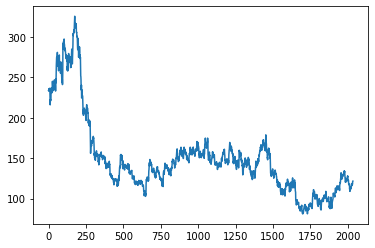

In [15]:
plt.plot(data_close)

In [16]:
data_open = data['Open']
data_open

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

DATA VISUALIZATION

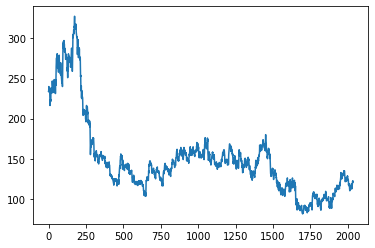

In [17]:
plt.plot(data_open)

<AxesSubplot:>

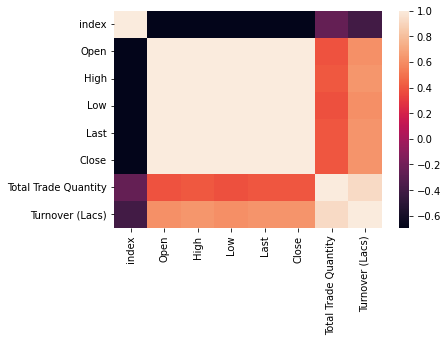

In [18]:
sns.heatmap(data.corr())

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_close=scaler.fit_transform(np.array(data_close).reshape(-1,1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [20]:
data_close.shape

(2035, 1)

TEST AND TRAIN SPLITTING

In [21]:
training_size = int(len(data_close) * 0.75)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

DATA PREPROCESSING

In [22]:
def create_dataset(dataset, time_step = 1):
    X_data, Y_data = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        X_data.append(a)
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [23]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [24]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [25]:
x_test.shape

(408, 100, 1)

In [26]:
y_test.shape

(408,)

In [27]:
x_train.shape

(1425, 100, 1)

In [28]:
y_train.shape

(1425,)

LSTM

In [29]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [30]:
Model=Sequential()
Model.add(LSTM(50,return_sequences=True , input_shape=(100,1)))
Model.add(LSTM(50,return_sequences=True))
Model.add(LSTM(50))
Model.add(Dense(1))
Model.compile(loss='mean_squared_error')

In [31]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
Model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 25s 446ms/step - loss: 0.0162 - val_loss: 0.0012
Epoch 2/100
23/23 [==============================] - 9s 382ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 3/100
23/23 [==============================] - 9s 385ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 8s 358ms/step - loss: 0.0037 - val_loss: 8.2887e-04
Epoch 5/100
23/23 [==============================] - 8s 371ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 8s 364ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/100
23/23 [==============================] - 9s 378ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 8s 362ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/100
23/23 [==============================] - 8s 351ms/step - loss: 0.0021 - val_loss: 7.4765e-04
Epoch 10/100
23/23 [==============================] - 8s 354ms/step - loss: 0.0022

PREDICTION

In [33]:
train_predict = Model.predict(x_train)
test_predict = Model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
math.sqrt(mean_squared_error(y_test, test_predict))

103.70328748404395

In [36]:
math.sqrt(mean_squared_error(y_train, train_predict))

161.4936422722112

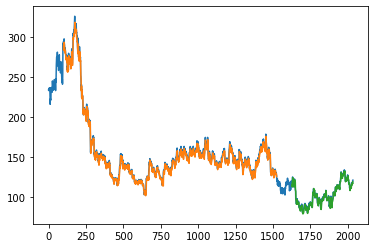

In [37]:
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(data_close)-1 ,:] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [42]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [46]:
list_output=[]
n_steps=100
NextNumberOfDays = 30
i=0

while(i<NextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yt = Model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yt))
        temp_input.extend(yt[0].tolist())
        temp_input=temp_input[1:]
        list_output.extend(yt.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yt = Model.predict(x_input, verbose=0)
        print(yt[0])
        temp_input.extend(yt[0].tolist())
        print(len(temp_input))
        list_output.extend(yt.tolist())
        i=i+1
    
print(list_output)

[0.16290414]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [47]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [48]:
data = data_close.tolist()
data.extend(list_output)


In [49]:
len(data_close)

2035

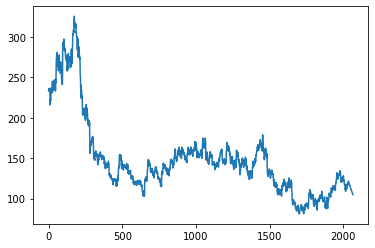

In [50]:
data=scaler.inverse_transform(data).tolist()
plt.plot(data)